In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**Importing the python module**

In [4]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Spatial Visualizations'''
import folium
import folium.plugins

'''NLP - WordCloud'''
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [18]:
data=pd.read_csv('listings_summary.csv')

In [19]:
data.head()

id                                               name  host_id  \
0   35303  La Casa Gaienmae C Harajuku, Omotesando is nearby   151977   
1  197677                          Oshiage Holiday Apartment   964081   
2  289597                  Private apt in central Tokyo #203   341577   
3  370759  Cozy flat #203, local area YET 10 mins to shib...  1573631   
4  700253                  Private apt in central Tokyo #201   341577   

             host_name  neighbourhood_group neighbourhood  latitude  \
0               Miyuki                  NaN    Shibuya Ku  35.67152   
1      Yoshimi & Marek                  NaN     Sumida Ku  35.71721   
2             Hide&Kei                  NaN     Nerima Ku  35.74267   
3  Gilles,Mayumi,Taiki                  NaN   Setagaya Ku  35.66443   
4             Hide&Kei                  NaN     Nerima Ku  35.74264   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  139.71203     Private room   4183              28                 18   
1  139.82596  Entire home/apt  11048               3                165   
2  139.65810  Entire home/apt   4171              28                113   
3  139.65707  Entire home/apt   6952              28                103   
4  139.65832  Entire home/apt   3957              28                103   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2018-07-28               0.18                               3   
1  2020-03-04               1.57                               1   
2  2020-02-17               1.18                               2   
3  2020-04-16               1.39                               3   
4  2019-10-04               1.12                               2   

   availability_365  
0                89  
1               271  
2               241  
3               364  
4               340

**Summary of Dataset**

In [20]:
print('Rows     :',data.shape[0])
print('Columns  :',data.shape[1])
print('\nFeatures :\n     :',data.columns.tolist())
print('\nMissing values    :',data.isnull().values.sum())
print('\nUnique values :  \n',data.nunique())

Rows     : 15352
Columns  : 16

Features :
     : ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing values    : 20583

Unique values :  
 id                                15352
name                              14139
host_id                            3708
host_name                          2530
neighbourhood_group                   0
neighbourhood                        55
latitude                           8189
longitude                          9552
room_type                             4
price                               701
minimum_nights                       34
number_of_reviews                   277
last_review                         623
reviews_per_month                   629
calculated_host_listings_count       51
availability_365                    366
dtype: i

**Missing Data **

In [21]:
data.shape

(15352, 16)

In [22]:
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum())*100)/data.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

Total     Percent
neighbourhood_group             15352  100.000000
reviews_per_month                2610   17.001042
last_review                      2610   17.001042
host_name                          11    0.071652
availability_365                    0    0.000000
calculated_host_listings_count      0    0.000000
number_of_reviews                   0    0.000000
minimum_nights                      0    0.000000
price                               0    0.000000
room_type                           0    0.000000
longitude                           0    0.000000
latitude                            0    0.000000
neighbourhood                       0    0.000000
host_id                             0    0.000000
name                                0    0.000000
id                                  0    0.000000

Here we are getting the count and the percentage of missing values.

In [31]:
#make a list of the variables that contain missing values
vars_with_na=[var for var in data.columns if data[var].isnull().sum()>1]

#print the variable name and the percentage of missing values 
for var in vars_with_na:
    print(var,np.round(data[var].isnull().mean(),3),'% missing values')

host_name 0.001 % missing values
neighbourhood_group 1.0 % missing values
last_review 0.17 % missing values
reviews_per_month 0.17 % missing values


**Getting Basic Stats from the data**

In [24]:
data.describe().T

count          mean           std  \
id                              15352.0  3.167375e+07  9.319600e+06   
host_id                         15352.0  1.704850e+08  9.954602e+07   
neighbourhood_group                 0.0           NaN           NaN   
latitude                        15352.0  3.569498e+01  1.424266e-01   
longitude                       15352.0  1.397352e+02  8.139239e-02   
price                           15352.0  2.624158e+04  7.636344e+04   
minimum_nights                  15352.0  3.293968e+00  9.114849e+00   
number_of_reviews               15352.0  2.654273e+01  4.056639e+01   
reviews_per_month               12742.0  1.695281e+00  1.365650e+00   
calculated_host_listings_count  15352.0  1.343473e+01  1.539916e+01   
availability_365                15352.0  1.557323e+02  1.155677e+02   

                                         min           25%           50%  \
id                               35303.00000  2.658525e+07  3.343554e+07   
host_id                         151977.00000  7.075525e+07  1.865996e+08   
neighbourhood_group                      NaN           NaN           NaN   
latitude                            27.07233  3.568623e+01  3.570302e+01   
longitude                          139.12319  1.396995e+02  1.397281e+02   
price                                0.00000  6.952000e+03  1.197900e+04   
minimum_nights                       1.00000  1.000000e+00  1.000000e+00   
number_of_reviews                    0.00000  2.000000e+00  1.100000e+01   
reviews_per_month                    0.02000  6.900000e-01  1.500000e+00   
calculated_host_listings_count       1.00000  3.000000e+00  8.000000e+00   
availability_365                     0.00000  6.300000e+01  1.500000e+02   

                                         75%           max  
id                              3.947100e+07  4.328692e+07  
host_id                         2.528881e+08  3.442701e+08  
neighbourhood_group                      NaN           NaN  
latitude                        3.572508e+01  3.583243e+01  
longitude                       1.397850e+02  1.422029e+02  
price                           2.000100e+04  1.000053e+06  
minimum_nights                  2.000000e+00  3.650000e+02  
number_of_reviews               3.400000e+01  5.290000e+02  
reviews_per_month               2.400000e+00  4.360000e+01  
calculated_host_listings_count  1.800000e+01  9.800000e+01  
availability_365                2.470000e+02  3.650000e+02

From the above table we can see than the mean price of rooms is 157 $.

**Finding out the correlations**

In [25]:
data.corr().style.background_gradient(cmap='coolwarm')
#No strong correlation except number_of_reviews vs reviews_per_month

So this is a colorful way of plotting a correlation plot.

**Lets See the Hotel Distribution in a Heat Map**

In [80]:
import folium
from folium.plugins import HeatMap
m=folium.Map([35.6804,139.7690],zoom_start=11)
HeatMap(data[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

The highest Density areas are marked in red and lowest density areas are marked in blue color.

**Lets Check How the price varies with area **

Area wise distribution of price shows that Manhattan has expensive and Staten Island has low priced rooms

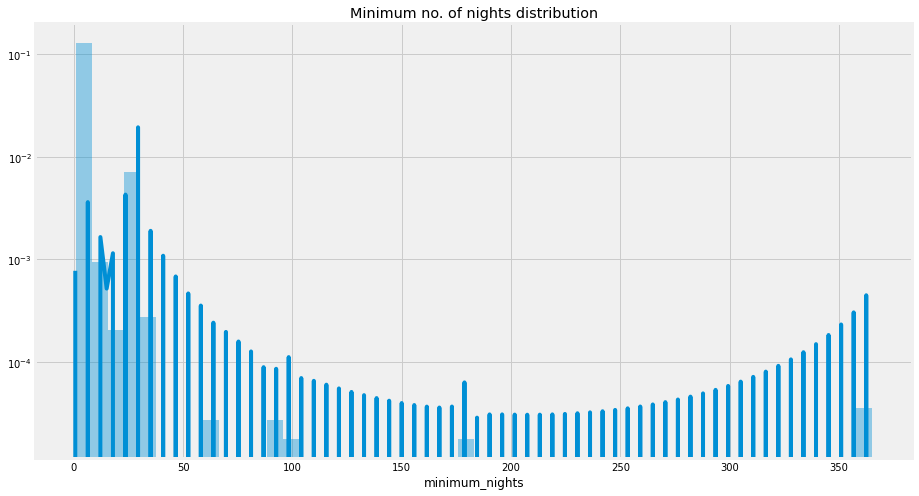

In [44]:
plt.figure(figsize=(14,8))
sns.distplot(data.minimum_nights).set_yscale('log')
plt.title('Minimum no. of nights distribution')
plt.show()

Above graph show the techinique to get the price distribution for a single neighbourhood

Red color dots are the apartment or rooms with higher price.I have considered prices upto 300 $ to get a goo representation on the plot.We can see that Manhattan region has more expensive apartments.

Manhattan has the most expensive accomodation followed by Brooklyn

**Categorising based on Price**

So most of the rooms fall in the Medium (75-200 $) category 

In [50]:
print ("Total Neighbourhoods: ", len(np.unique(data.neighbourhood)))

Total Neighbourhoods:  55


In [51]:
#using groupby to group two columns neighbourhood and price also find mean of price along with sorting the values and resetting index
df_top_prices_by_neighbourhood = data.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price').reset_index()

In [52]:
df_top_prices_by_neighbourhood.columns

Index(['neighbourhood', 'price'], dtype='object')

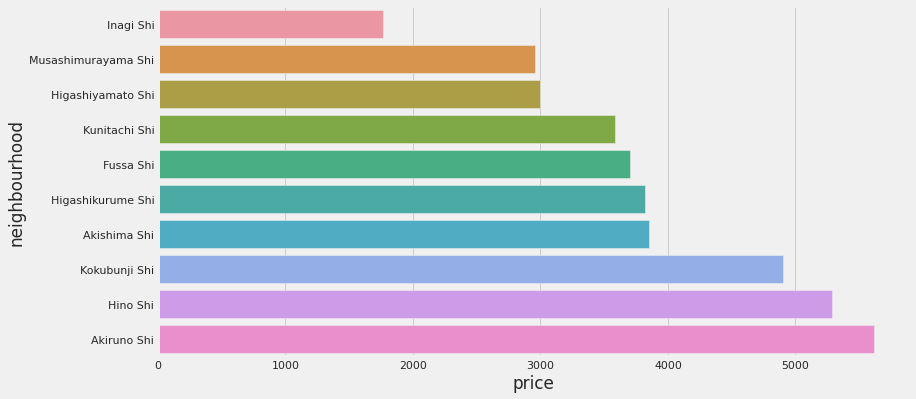

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(y="neighbourhood", x="price", data=df_top_prices_by_neighbourhood.head(10))
plt.ioff()

Bulls Head, Hunts Point and Tremont are the neighbourhoods with least price 

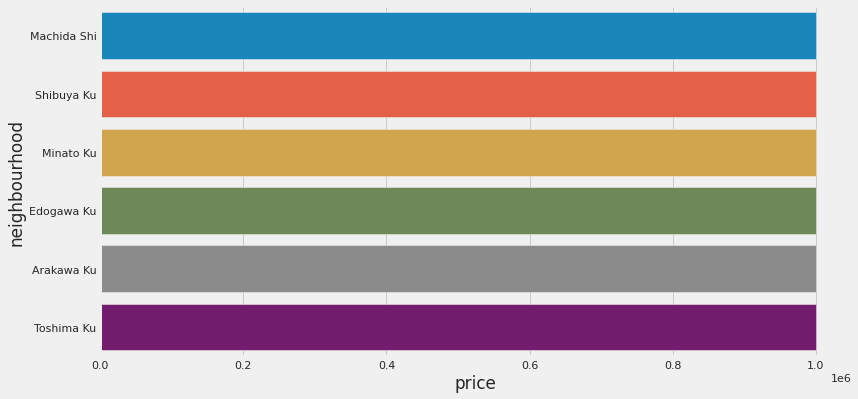

In [54]:
#method2
plt.figure(figsize=(12,6))
sns.barplot(y="neighbourhood", x="price", data=data.nlargest(10,['price']))
plt.ioff()

Astoria,Greenpoint,SideEast and Harlem have the the most expensive rooms

**Getting the room details **

In [56]:
import plotly.offline as pyo
import plotly.graph_objs as go
roomdf = data.groupby('room_type').size()/data['room_type'].count()*100
labels = roomdf.index
values = roomdf.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

We can see that Entire home apartment has highest share followed by private room and least prefered is shared room

We have got the Neighborhood wise share of rooms 

/home/harry/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



<Figure size 720x432 with 0 Axes>

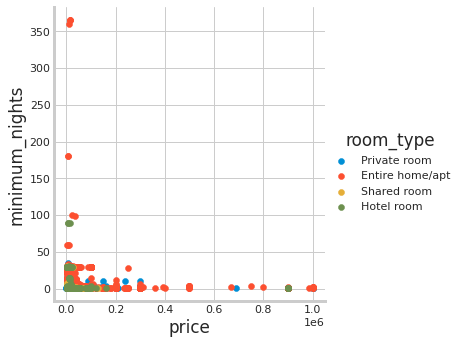

In [58]:
# soure: previous project
plt.figure(figsize=(10,6))
sns.set_style("whitegrid");
sns.FacetGrid(data,hue='room_type',size=5).map(plt.scatter,'price','minimum_nights').add_legend()
plt.ioff()
plt.show()

<Figure size 720x432 with 0 Axes>

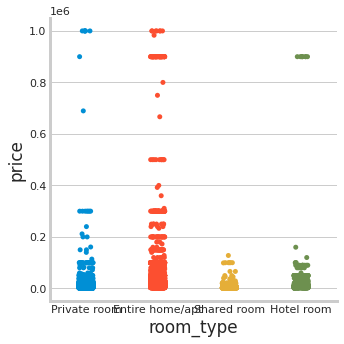

In [59]:
#catplot room type and price
plt.figure(figsize=(10,6))
sns.catplot(x="room_type", y="price", data=data);
plt.ioff()

We can see that rooms with low minimum nights have high price.As mentioned before Home/Apt have the highest price.

/home/harry/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/home/harry/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/home/harry/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/home/harry/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and

Text(0, 0.5, '')

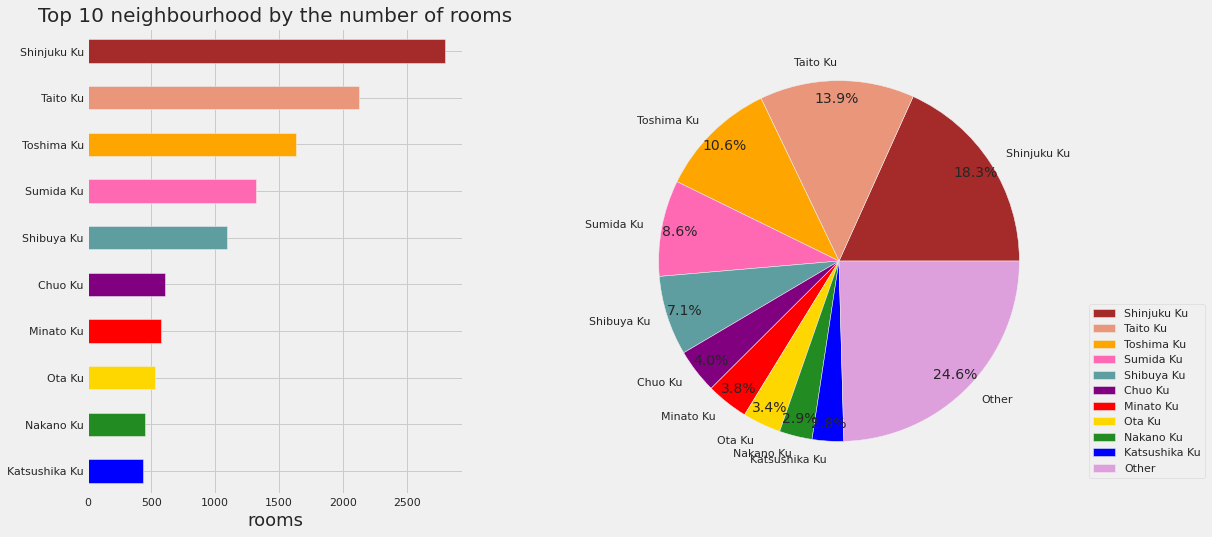

In [60]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
data.neighbourhood.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 neighbourhood by the number of rooms",size=20)
ax[0].set_xlabel('rooms',size=18)


count=data['neighbourhood'].value_counts()
groups=list(data['neighbourhood'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')

Williamsburg,Bedford-Stuyvesant and Hariem have highest number of rooms

**Lets look at the reviews **

<Figure size 720x432 with 0 Axes>

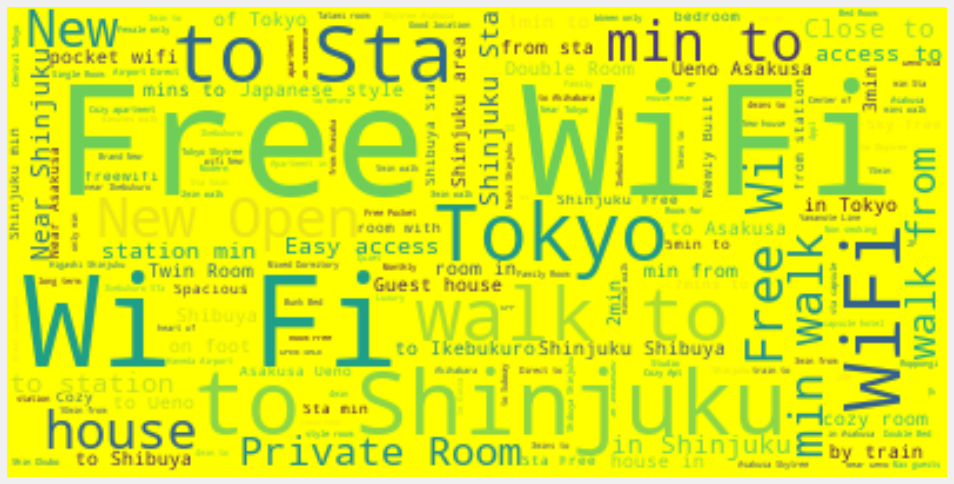

In [61]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in data.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="yellow").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Our word cloud shows the words that are more often used in the Name of this listings 

In [62]:
#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in data.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [63]:
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [64]:
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

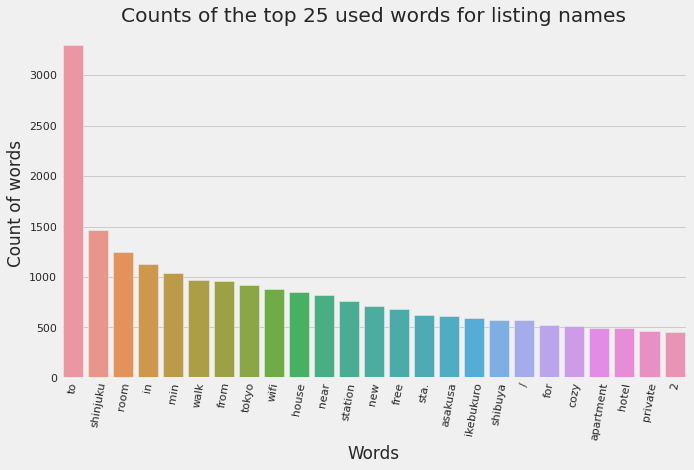

In [65]:
#we are going to use barplot for this visualization
plt.figure(figsize=(10,6))
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80);

We can see that words like room,debroom,private,apartment are used more in the name of the apartments.

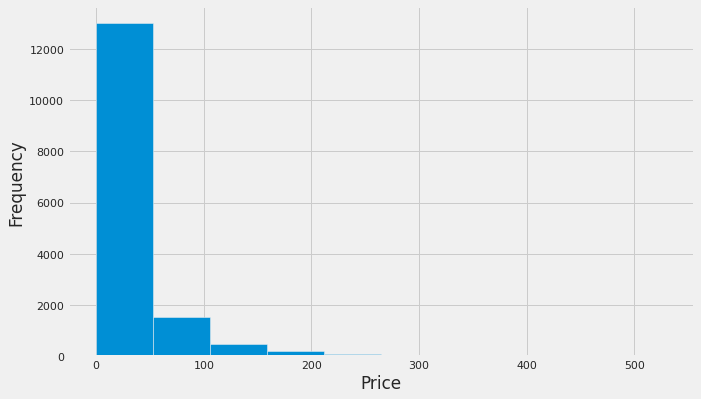

In [66]:
plt.figure(figsize=(10,6))
data['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.ioff()
plt.show()

We can see that low cost rooms or in range 0-50 $ have more reviews.

**Displaying rooms with maximum Reviews **

In [67]:
df1=data.sort_values(by=['number_of_reviews'],ascending=False).head(1000)
df1.head()

id                                               name    host_id  \
4445  27811307          New design capsule hotel (co-ed, no lock)  209813314   
4531  27917164           Dormitory room| Hotel&Hostel KIKKA Tokyo  206086589   
2153  21015730   A cozy private space! Mixed Dormitory with Wi-Fi  150672186   
94     4050925            【自主隔離】浅草駅徒歩6分･貸切戸建て･浅草寺本堂まで徒歩1分!【空港お迎え】   21004633   
3537  25924772  Tokyo BEST TOWN LANDSCAPE DEVELOPMENT AWARD wi...  194869594   

                 host_name  neighbourhood_group neighbourhood  latitude  \
4445             Hotel Zen                  NaN       Chuo Ku  35.68655   
4531                 Kikka                  NaN       Chuo Ku  35.69297   
2153  ｸﾞﾘｯｽﾞ東京浅草橋 ﾎﾃﾙ&ﾎｽﾃﾙ                  NaN      Taito Ku  35.69850   
94                   Yoshi                  NaN      Taito Ku  35.71648   
3537                  Kura                  NaN      Taito Ku  35.71152   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
4445  139.78153     Private room   9975               1                529   
4531  139.78034      Shared room   2781               1                526   
2153  139.78279      Shared room   2246               1                488   
94    139.79926  Entire home/apt  40008               1                474   
3537  139.78410       Hotel room   3003               1                407   

     last_review  reviews_per_month  calculated_host_listings_count  \
4445  2020-04-11              43.60                              11   
4531  2020-03-13              27.30                               4   
2153  2020-03-16              18.01                              12   
94    2020-04-12               6.99                               4   
3537  2020-03-26              18.09                               1   

      availability_365  
4445                 0  
4531               330  
2153                 0  
94                 355  
3537                 0

In [82]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
print('Rooms with the most number of reviews')
Lat=35.6804
Long=139.7690
mapdf1=folium.Map([Lat,Long],zoom_start=10,)

mapdf1_rooms_map=plugins.MarkerCluster().add_to(mapdf1)

for lat,lon,label in zip(df1.latitude,df1.longitude,df1.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapdf1_rooms_map)
mapdf1.add_child(mapdf1_rooms_map)

mapdf1

Rooms with the most number of reviews


**Lets look at room Availability** 

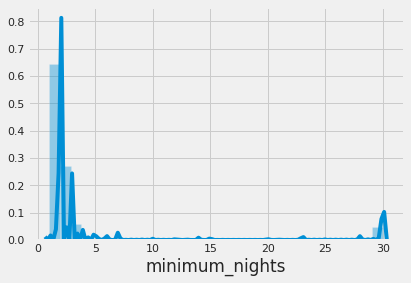

In [69]:
sns.distplot(data[(data['minimum_nights'] <= 30) & (data['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.ioff()

We can see clearly that most books are for 1-2-3 days

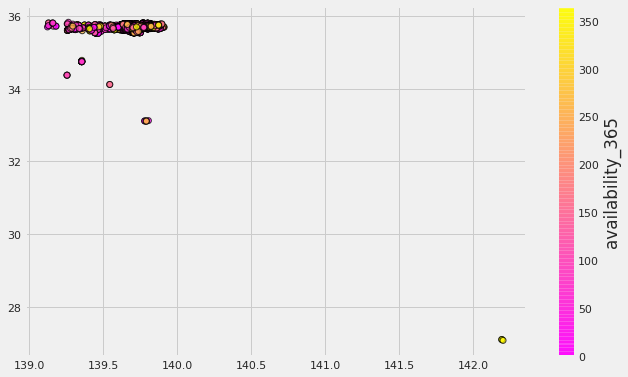

In [70]:
plt.figure(figsize=(10,6))
plt.scatter(data.longitude, data.latitude, c=data.availability_365, cmap='spring', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')

**Price prediction with Machine Learning **